In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (f'Device is: {device}.')

Device is: cuda.


In [3]:
path = 'C:\\Users\\Toffee\\Documents\\Coding\\AI and ML\\DL from scratch\\data\\Personal\\myNewData.csv'

In [4]:
data = pd.read_csv(path)
data.columns=['x','y','z']

In [5]:
targets = torch.tensor(data['z'].values).float()
features = torch.tensor(data.drop('z', axis=1).values).float()

train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=3, shuffle=True)

test_loader = data_utils.DataLoader(train, batch_size=100, shuffle=True)

In [6]:
class SimpleNN(nn.Module):
    def __init__ (self, input_size, n_hidden, output_size):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, output_size)
        )
        
    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [7]:
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        data = data.view(-1, 2)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1), target)
        loss.backward()
        optimizer.step()
        
        print (f"Train Epoch: {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)} ({100*batch_idx/len(train_loader)}%)]")
        print (f"Training loss: {loss.item():.6f}")
            
def test(model):
    model.eval()
    test_loss = 0
    accuracy = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        with torch.no_grad():
            data, target = data.to(device), target.to(device)

            data = data.view(-1, 2)
            output = model(data)
            test_loss += F.mse_loss(output.view(-1), target).item()
        
    test_loss /= len(test_loader.dataset)
    accuracy /= len(test_loader.dataset)
    print (f'\nTest set: Average loss: {test_loss:.4f}.')
    
    return data, target, output.view(-1)

In [8]:
n_hidden = 100

model = SimpleNN (2, n_hidden, 1).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(0,1):
    train(epoch,model)
    final_data, final_target, final_output = test(model)

Train Epoch: 0 [0/720 (0.0%)]
Training loss: 0.910520
Train Epoch: 0 [3/720 (0.4166666666666667%)]
Training loss: 0.773329
Train Epoch: 0 [6/720 (0.8333333333333334%)]
Training loss: 0.601506
Train Epoch: 0 [9/720 (1.25%)]
Training loss: 0.347282
Train Epoch: 0 [12/720 (1.6666666666666667%)]
Training loss: 0.467009
Train Epoch: 0 [15/720 (2.0833333333333335%)]
Training loss: 0.374286
Train Epoch: 0 [18/720 (2.5%)]
Training loss: 0.183375
Train Epoch: 0 [21/720 (2.9166666666666665%)]
Training loss: 0.282182
Train Epoch: 0 [24/720 (3.3333333333333335%)]
Training loss: 0.260492
Train Epoch: 0 [27/720 (3.75%)]
Training loss: 0.102587
Train Epoch: 0 [30/720 (4.166666666666667%)]
Training loss: 0.121903
Train Epoch: 0 [33/720 (4.583333333333333%)]
Training loss: 0.101750
Train Epoch: 0 [36/720 (5.0%)]
Training loss: 0.008767
Train Epoch: 0 [39/720 (5.416666666666667%)]
Training loss: 0.040364
Train Epoch: 0 [42/720 (5.833333333333333%)]
Training loss: 0.060471
Train Epoch: 0 [45/720 (6.25%)]

Training loss: 0.000891
Train Epoch: 0 [375/720 (52.083333333333336%)]
Training loss: 0.002160
Train Epoch: 0 [378/720 (52.5%)]
Training loss: 0.001218
Train Epoch: 0 [381/720 (52.916666666666664%)]
Training loss: 0.002074
Train Epoch: 0 [384/720 (53.333333333333336%)]
Training loss: 0.002224
Train Epoch: 0 [387/720 (53.75%)]
Training loss: 0.000742
Train Epoch: 0 [390/720 (54.166666666666664%)]
Training loss: 0.002328
Train Epoch: 0 [393/720 (54.583333333333336%)]
Training loss: 0.001868
Train Epoch: 0 [396/720 (55.0%)]
Training loss: 0.000084
Train Epoch: 0 [399/720 (55.416666666666664%)]
Training loss: 0.034130
Train Epoch: 0 [402/720 (55.833333333333336%)]
Training loss: 0.000442
Train Epoch: 0 [405/720 (56.25%)]
Training loss: 0.000969
Train Epoch: 0 [408/720 (56.666666666666664%)]
Training loss: 0.002704
Train Epoch: 0 [411/720 (57.083333333333336%)]
Training loss: 0.001406
Train Epoch: 0 [414/720 (57.5%)]
Training loss: 0.000892
Train Epoch: 0 [417/720 (57.916666666666664%)]
Tra

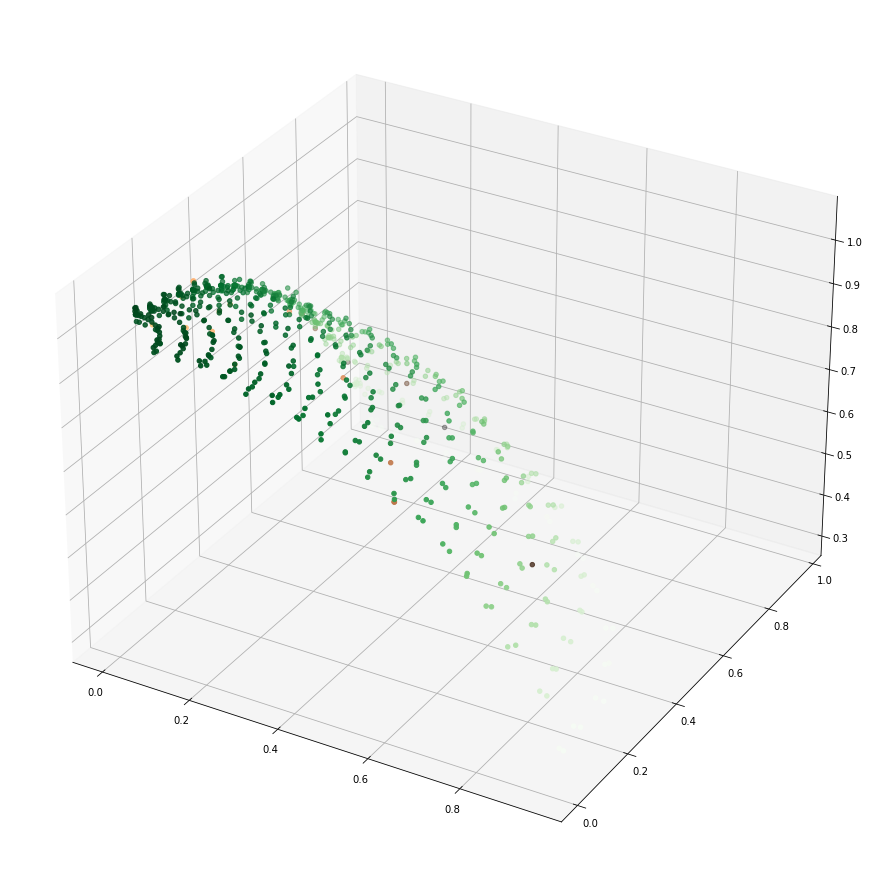

In [9]:
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection='3d')
xdata = data['x']
ydata = data['y']
zdata = data['z']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
final_x = final_data[:,0].cpu().numpy()
final_y = final_data[:,1].cpu().numpy()
final_pred = final_output.cpu().numpy()
ax.scatter3D(final_x, final_y, final_pred, c=final_pred, cmap='copper');


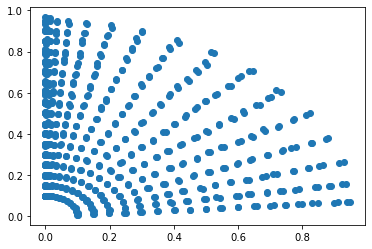

In [10]:
plt.scatter (xdata,ydata)

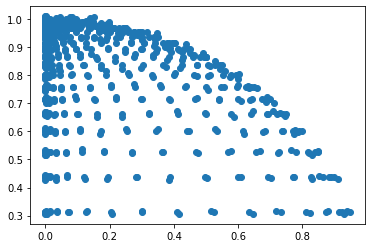

In [11]:
plt.scatter(xdata, zdata)

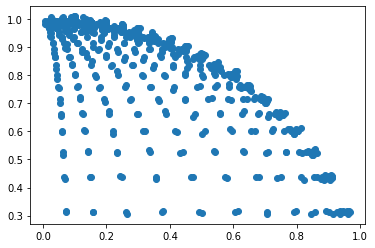

In [12]:
plt.scatter(ydata, zdata)

In [13]:
path_2 = 'C:\\Users\\Toffee\\Documents\\Coding\\AI and ML\\DL from scratch\\data\\Personal\\myNewData_modded.csv'

data = pd.read_csv(path)
data.columns=['x','y','z']

targets = torch.tensor(data['z'].values).float()
features = torch.tensor(data.drop('z', axis=1).values).float()

train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=3, shuffle=True)

test_loader = data_utils.DataLoader(train, batch_size=100, shuffle=True)
n_hidden = 100

model = SimpleNN (2, n_hidden, 1).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

final_data, final_target, final_output = test(model)


Test set: Average loss: 0.0057.
